# Calibration
----------------------

This example shows how to calibrate a classifier through atom.

The data used is a variation on the [Australian weather dataset](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) from Kaggle. You can download it from [here](https://github.com/tvdboom/ATOM/blob/master/examples/datasets/weatherAUS.csv). The goal of this dataset is to predict whether or not it will rain tomorrow training a binary classifier on target `RainTomorrow`.

## Load the data

In [1]:
# Import packages
import pandas as pd
from atom import ATOMClassifier

In [2]:
# Load the data
X = pd.read_csv("./datasets/weatherAUS.csv")

# Let's have a look
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,MelbourneAirport,18.0,26.9,21.4,7.0,8.9,SSE,41.0,W,SSE,...,95.0,54.0,1019.5,1017.0,8.0,5.0,18.5,26.0,Yes,0
1,Adelaide,17.2,23.4,0.0,NaN,NaN,S,41.0,S,WSW,...,59.0,36.0,1015.7,1015.7,NaN,NaN,17.7,21.9,No,0
2,Cairns,18.6,24.6,7.4,3.0,6.1,SSE,54.0,SSE,SE,...,78.0,57.0,1018.7,1016.6,3.0,3.0,20.8,24.1,Yes,0
3,Portland,13.6,16.8,4.2,1.2,0.0,ESE,39.0,ESE,ESE,...,76.0,74.0,1021.4,1020.5,7.0,8.0,15.6,16.0,Yes,1
4,Walpole,16.4,19.9,0.0,NaN,NaN,SE,44.0,SE,SE,...,78.0,70.0,1019.4,1018.9,NaN,NaN,17.4,18.1,No,0


## Run the pipeline

In [3]:
atom = ATOMClassifier(X, "RainTomorrow", n_rows=1e4, verbose=1, warnings=False)

# Apply data cleaning steps
atom.clean()
atom.impute(strat_num="median", strat_cat="most_frequent")
atom.encode(strategy="target", max_onehot=5, frac_to_other=0.05)

# Train a linear SVM
atom.run("lsvm")

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (10000, 22)
Scaled: False
Missing values: 22673 (10.3%)
Categorical features: 5 (23.8%)
Duplicate samples: 1 (0.0%)
-------------------------------------
Train set size: 8000
Test set size: 2000
-------------------------------------

Applying data cleaning...
Fitting Imputer...
Imputing missing values...
Fitting Encoder...
Encoding categorical columns...

Training ========================= >>
Models: lSVM
Metric: f1


Results for Linear-SVM:         
Fit ---------------------------------------------
Train evaluation --> f1: 0.5884
Test evaluation --> f1: 0.5679
Time elapsed: 0.343s
-------------------------------------------------
Total time: 0.343s


Final results ==================== >>
Duration: 0.343s
-------------------------------------
Linear-SVM --> f1: 0.5679


## Analyze the results

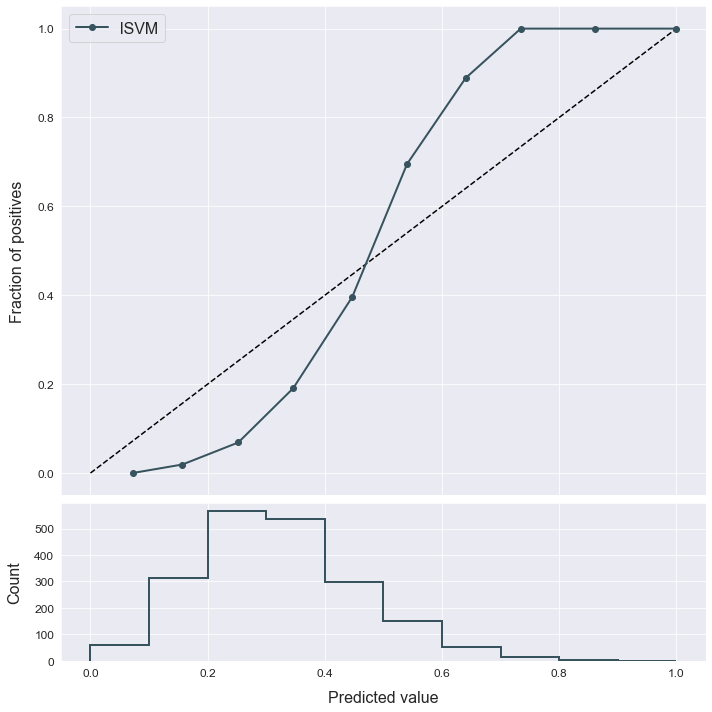

In [4]:
# Check the model's calibration
atom.plot_calibration()

In [5]:
# Let's try to improve it using the calibrate method
atom.lsvm.calibrate(method="isotonic", cv=5)

Model lSVM successfully calibrated!


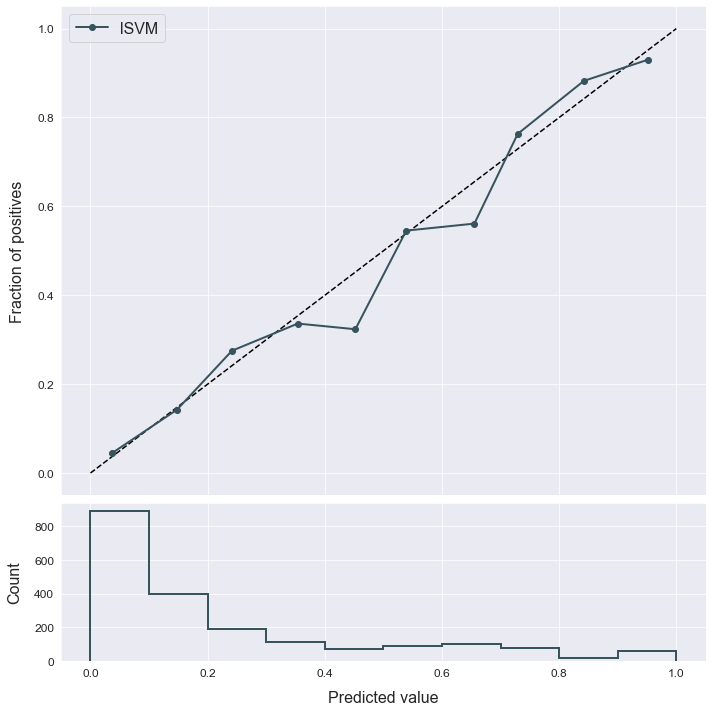

In [6]:
# And check again...
atom.plot_calibration()